In [1]:
import numpy as np

In [2]:
X = np.random.rand(50,1)

In [3]:
X = np.sort(X, axis=0)

In [4]:
y = 5*X+2

In [5]:
y += np.random.normal(scale=0.33, size=y.shape)

In [6]:
import matplotlib.pyplot as plt

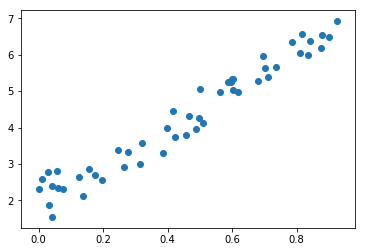

In [7]:
plt.scatter(X, y)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
model.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
weights = model.coef_

In [12]:
weights

array([[5.15593564]])

In [13]:
weights[0][0] # угол

5.155935636298576

In [14]:
bias = (model.predict(X) - weights[0][0]*X)[0][0] # выдергиваем сдвиг модели

In [15]:
bias

1.9293319197438672

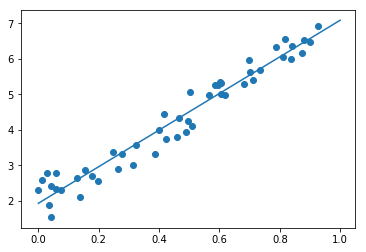

In [16]:
plt.scatter(X, y)
plt.plot(np.arange(0,2), np.arange(0,2)*weights[0][0] + bias)
plt.show()

In [17]:
from lightgbm import LGBMRegressor

In [18]:
tree = LGBMRegressor(min_child_samples=1, n_estimators=100, max_depth=10) 

In [19]:
tree.fit(X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=10, min_child_samples=1,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

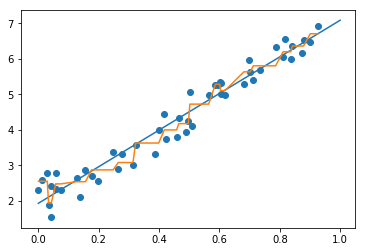

In [20]:
plt.scatter(X, y)
plt.plot(np.arange(0,2), np.arange(0,2)*weights[0][0] + bias)
plt.plot(X, tree.predict(X))
plt.show()

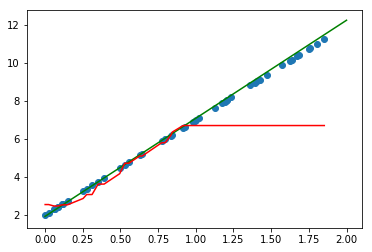

In [21]:
plt.plot(np.arange(0,3), np.arange(0,3)*weights[0][0] + bias, color='green')
plt.plot(2*X, tree.predict(2*X), color='red')
plt.scatter(2*X, 5*(2*X)+2)
plt.show()

In [22]:
tree_with_lin_y = LGBMRegressor(min_child_samples=1, n_estimators=2, max_depth=4) 

In [23]:
tree_with_lin_y.fit(X, (y - model.predict(X)))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       learning_rate=0.1, max_depth=4, min_child_samples=1,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=2,
       n_jobs=-1, num_leaves=31, objective=None, random_state=None,
       reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

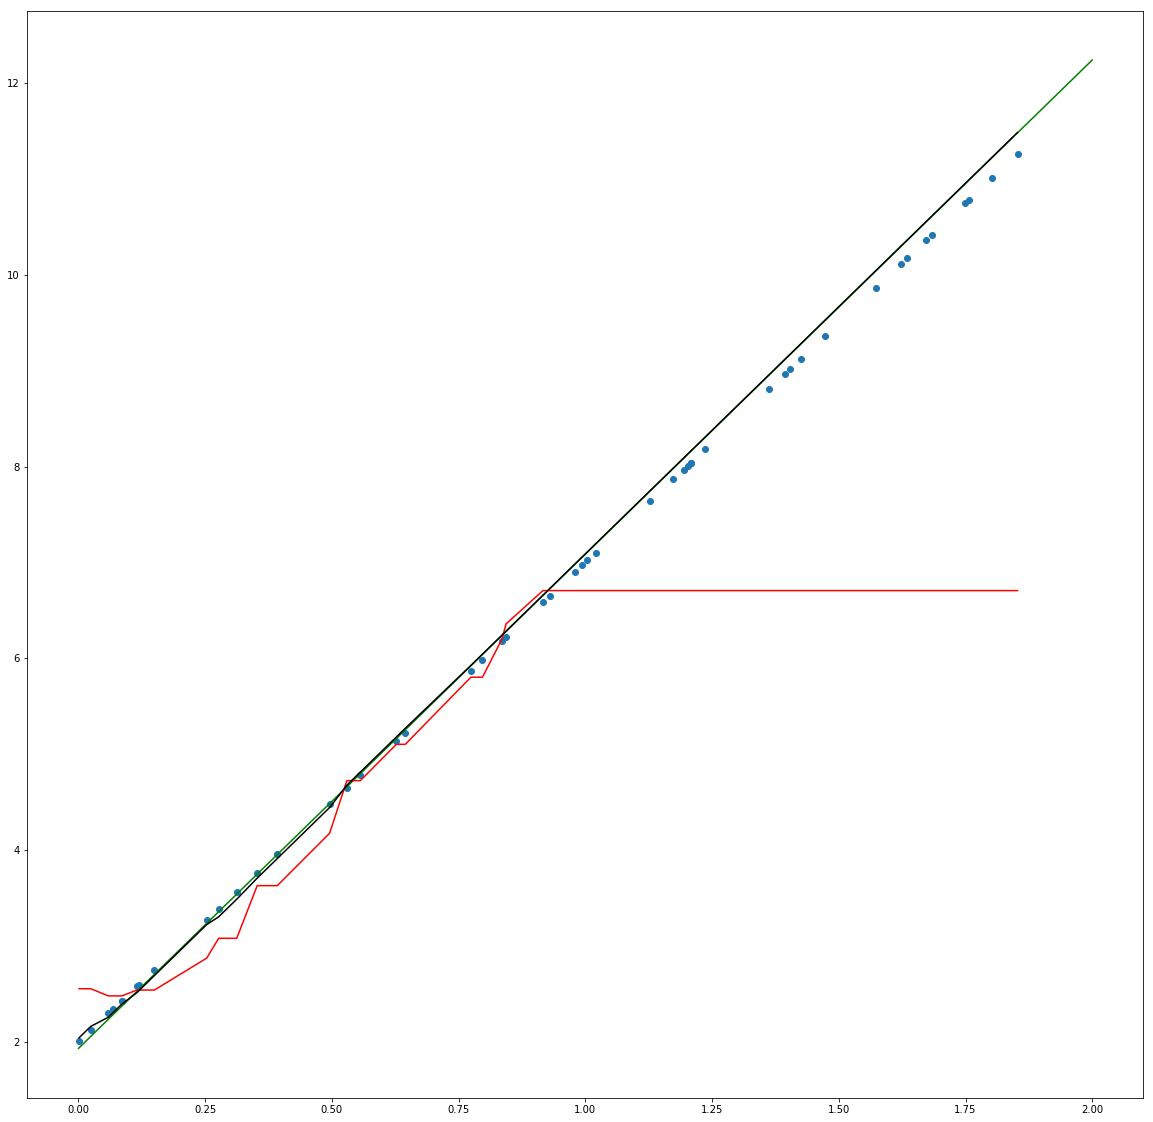

In [24]:
plt.figure(figsize=(20,20))
plt.scatter(2*X, 5*(2*X)+2)
plt.plot(np.arange(0,3), np.arange(0,3)*weights[0][0] + bias, color='green')
plt.plot(2*X, tree.predict(2*X), color='red')
plt.plot(2*X, tree_with_lin_y.predict(2*X) + model.predict(2*X).T[0], color='black')
plt.show()

In [25]:
(tree_with_lin_y.predict(2*X) + model.predict(2*X)).shape

(50, 50)

In [26]:
tree_with_lin_y.predict(2*X)

array([ 0.10448473,  0.10448473,  0.02112608,  0.02112608,  0.02112608,
        0.02112608, -0.01258094, -0.01258094, -0.01258094, -0.01258094,
       -0.05352763, -0.05352763, -0.0418896 , -0.0418896 , -0.0418896 ,
        0.01593543,  0.01593543,  0.01548063,  0.01548063,  0.00399375,
        0.00399375,  0.00399375,  0.00399375,  0.00399375,  0.00399375,
        0.00399375,  0.00399375,  0.00399375,  0.00399375,  0.00399375,
        0.00399375,  0.00399375,  0.00399375,  0.00399375,  0.00399375,
        0.00399375,  0.00399375,  0.00399375,  0.00399375,  0.00399375,
        0.00399375,  0.00399375,  0.00399375,  0.00399375,  0.00399375,
        0.00399375,  0.00399375,  0.00399375,  0.00399375,  0.00399375])

In [27]:
model.predict(2*X).T[0]

array([ 1.93497947,  2.05399506,  2.23369233,  2.28002161,  2.37037526,
        2.37143678,  2.52344965,  2.54200492,  2.70135165,  3.2335554 ,
        3.35565837,  3.53905206,  3.74707257,  3.95130444,  4.4838663 ,
        4.65948093,  4.79615513,  5.16268662,  5.25332712,  5.92080915,
        6.03879025,  6.23580775,  6.27918662,  6.65419917,  6.72637945,
        6.97832445,  7.05198787,  7.10699551,  7.19055933,  7.74776562,
        7.98040622,  8.08379963,  8.12735578,  8.15512389,  8.15627888,
        8.30197046,  8.95336713,  9.11323399,  9.16913331,  9.27555234,
        9.51798519, 10.03716627, 10.29319322, 10.36006411, 10.5547368 ,
       10.60924236, 10.94814443, 10.98904767, 11.21950331, 11.48123118])

In [28]:
### TODO: Compare with Pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [29]:
X.shape

(50, 1)

In [30]:
y.shape

(50, 1)

In [66]:
class net(nn.Module):
    def __init__(self,):
        super(net, self).__init__()
        self.seq = nn.Sequential(nn.Linear(1, 1), 
                                 nn.ReLU(),
                                 nn.Linear(1, 1)
                                )
#         self.layer_1 = nn.Linear(1, 1)
#         self.activation = nn.ReLU()
#         self.layer_2 = nn.Linear(1, 1)
#         self.activation = nn.ReLU()
    
    def forward(self, X):
        return self.seq(X)
#         out = self.layer(X)
#         return self.activation(out)

In [67]:
X_tensor = torch.from_numpy(X).float()

In [68]:
y_tensor = torch.from_numpy(y)

In [69]:
nn_model = net()
optimizer = optim.SGD(nn_model.parameters(), lr=0.1)

for epoch in range(1, 31):
    optimizer.zero_grad()
    _y = nn_model.forward(X_tensor)
#     print(type(_y))
    loss = F.mse_loss(y_tensor, _y.double())
    print('Epoch: ', epoch, 'Loss value: ', loss.item())
    loss.backward()
    optimizer.step()
    

Epoch:  1 Loss value:  20.53445281455273
Epoch:  2 Loss value:  12.82319976527991
Epoch:  3 Loss value:  6.475098746151912
Epoch:  4 Loss value:  2.9740648327419406
Epoch:  5 Loss value:  2.408395510472371
Epoch:  6 Loss value:  2.2699433344612157
Epoch:  7 Loss value:  2.1481962146970948
Epoch:  8 Loss value:  2.0383685543378047
Epoch:  9 Loss value:  1.9376787853924349
Epoch:  10 Loss value:  1.8441304889429495
Epoch:  11 Loss value:  1.756238196119983
Epoch:  12 Loss value:  1.672881885892645
Epoch:  13 Loss value:  1.5932100802571505
Epoch:  14 Loss value:  1.5165737762908427
Epoch:  15 Loss value:  1.4424805159463994
Epoch:  16 Loss value:  1.3705602672515633
Epoch:  17 Loss value:  1.3005425772944839
Epoch:  18 Loss value:  1.2322377673075098
Epoch:  19 Loss value:  1.1655236215777207
Epoch:  20 Loss value:  1.1003347872617633
Epoch:  21 Loss value:  1.0366543377636557
Epoch:  22 Loss value:  0.9745061713364167
Epoch:  23 Loss value:  0.9139484138597095
Epoch:  24 Loss value:  0.

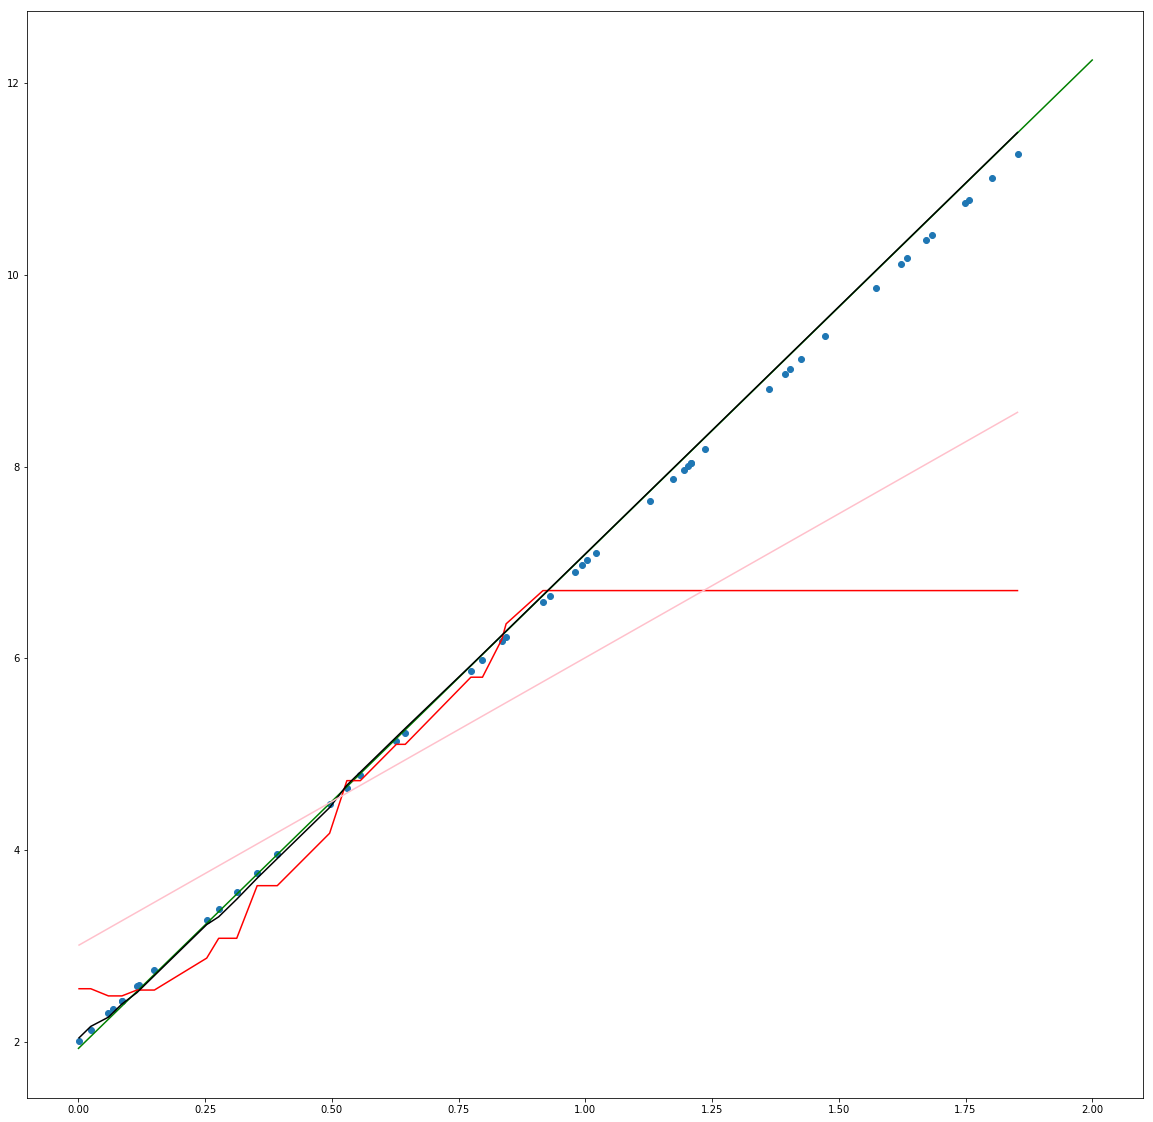

In [70]:
plt.figure(figsize=(20,20))
plt.scatter(2*X, 5*(2*X)+2)
plt.plot(np.arange(0,3), np.arange(0,3)*weights[0][0] + bias, color='green')
plt.plot(2*X, tree.predict(2*X), color='red')
plt.plot(2*X, tree_with_lin_y.predict(2*X) + model.predict(2*X).T[0], color='black')
plt.plot(2*X, nn_model(X_tensor*2).data.numpy(), color='pink')
plt.show()

In [73]:
# TODO: Pipeline для Torch с передачей данных